In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kaggle_survey_2020_responses.csv",skiprows = 1)

In [3]:
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1) How many years of experience most people have ?

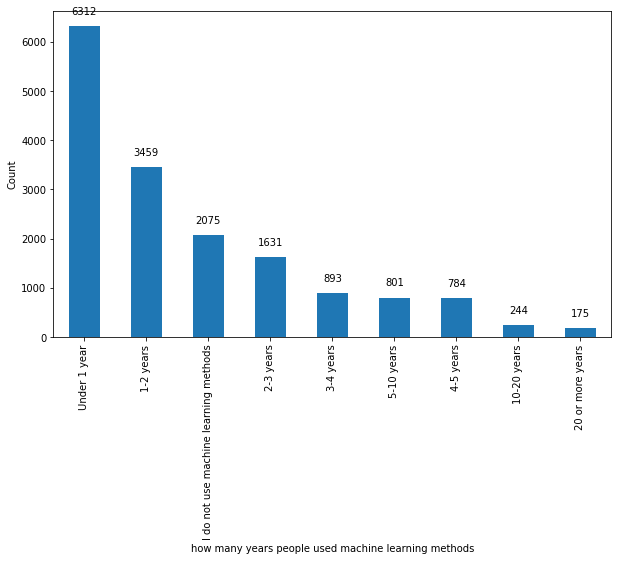

In [4]:
ax=df["For how many years have you used machine learning methods?"].value_counts().plot(kind='bar',figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('how many years people used machine learning methods')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+300), ha='center', va='center')

### 2) Which gender dominates data science industry ?

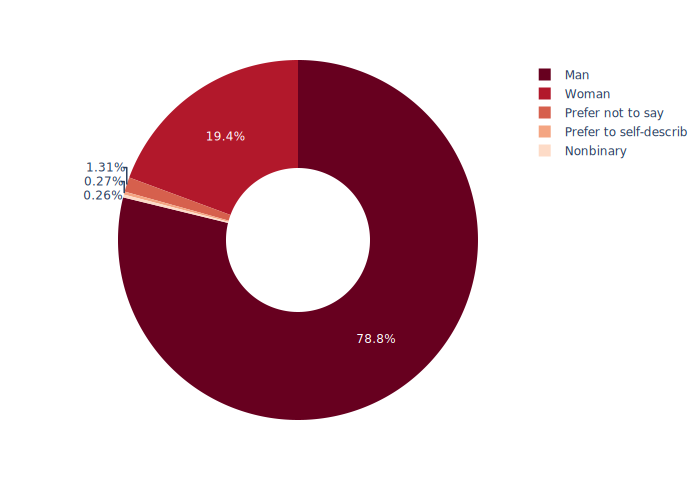

In [5]:
import plotly.io as pio
pio.renderers.default = "browser"
y = df["What is your gender? - Selected Choice"].value_counts()
y_values = []
y_gender = []
for i in range(len(y)):
    n = y[i]
    y_values.append(n)
    y_gender.append(y[y==n].index[0])
plot = px.pie( values = y_values, names = y_gender, color_discrete_sequence=px.colors.sequential.RdBu, hole=0.4)
plot.show(renderer="svg")


In [6]:
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3)Which language is Popular among Data scientists ?

In [7]:
m=df.groupby("What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python")["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].count()

for i in range(8,20):
    name=df.columns[i]
    m=m.append(df.groupby(name)[name].count())

In [8]:
name="What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice"
n=df.groupby(name)[name].count()

In [9]:
new=pd.concat([m, n], axis=1)
new=new.rename_axis("lang")

In [10]:
new=new.rename(columns={"What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice": "recomended"})

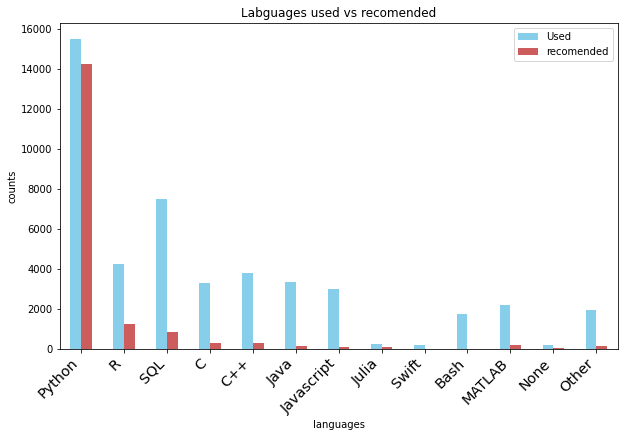

In [11]:
yesSeries =new[0]
nodSeries = new['recomended']

newdf = pd.DataFrame({"Used":yesSeries,"recomended":nodSeries})
ax = newdf.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Labguages used vs recomended",figsize=(10,6))
ax.set_xlabel("languages")
ax.set_ylabel("counts")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()



In [12]:
m

Python        15530
R              4277
SQL            7535
C              3315
C++            3827
Java           3367
Javascript     2995
Julia           262
Swift           198
Bash           1776
MATLAB         2217
None            206
Other          1945
dtype: int64

### 4) What are the Buzzwords in Data Science ?

In [13]:
dwc=m
dwc=dwc.drop(dwc.index[-2:])
for i in [*range(21,31), *range(33,45), *range(53,63),*range(66,80),*range(82,92)]:
    name=df.columns[i]
    dwc=dwc.append(df.groupby(name)[name].count())
dwc

Python                                     15530
R                                           4277
SQL                                         7535
C                                           3315
C++                                         3827
                                           ...  
Dense Neural Networks (MLPs, etc)           3364
Convolutional Neural Networks               5859
Generative Adversarial Networks             1024
Recurrent Neural Networks                   3468
Transformer Networks (BERT, gpt-3, etc)     1298
Length: 67, dtype: int64

In [14]:
data=dwc.to_dict()

In [36]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

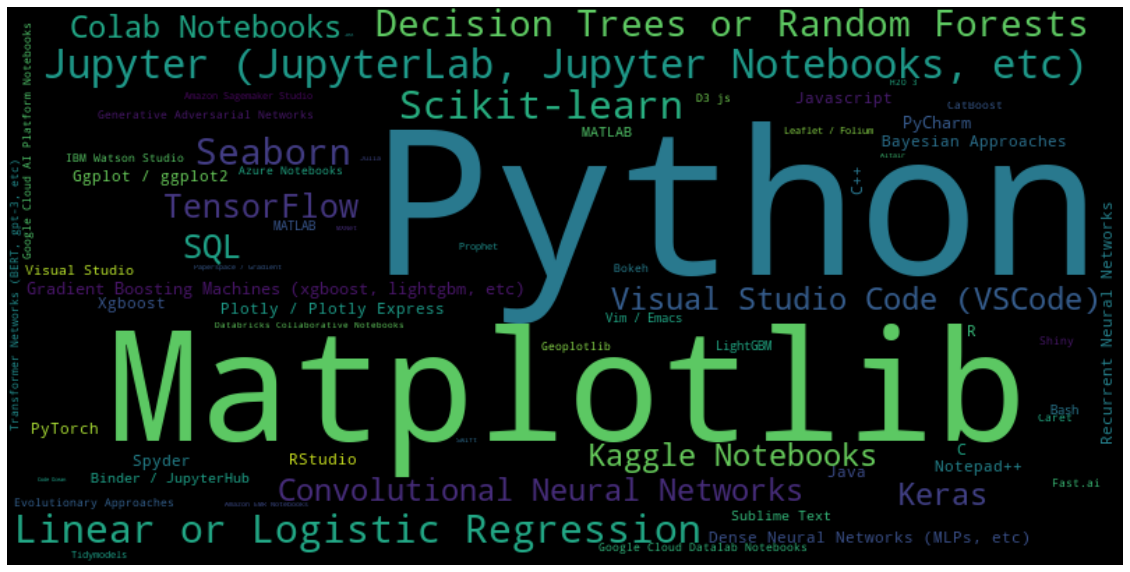

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5) Where do most of the people deploy their data analysis or machine learning applications?

In [17]:
name=df.columns[221]
deploy=df.groupby(name)[name].count()
deploy

for i in range(222,229):
    name=df.columns[i]
    deploy=deploy.append(df.groupby(name)[name].count())
deploy

 Plotly Dash        227
 Streamlit          186
 NBViewer            92
 GitHub            3434
 Personal blog      527
 Kaggle            1878
 Colab             1247
 Shiny              332
dtype: int64

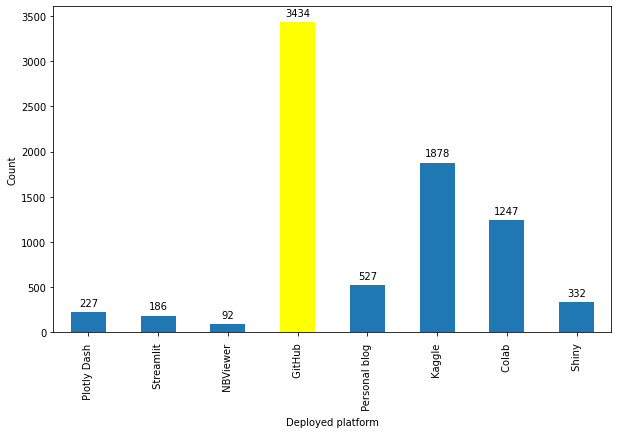

In [18]:
ax =deploy.plot(kind="bar",figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('Deployed platform')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+100), ha='center', va='center')
    
ax.patches[3].set_facecolor('yellow')

In [19]:
df[df.columns[93]]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
20031    NaN
20032    NaN
20033    NaN
20034    NaN
20035    NaN
Name: Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Other, Length: 20036, dtype: object

In [20]:
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 6)What is age of most people? 

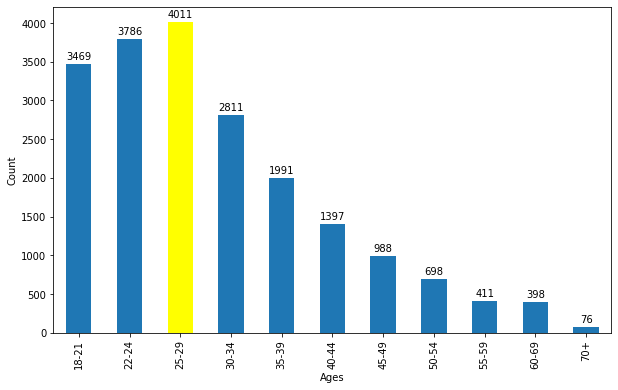

In [21]:
name=df.columns[1]
age=df.groupby(name)[name].count()

ax =age.plot(kind="bar",figsize=(10,6))
plt.ylabel('Count')
ax.set_xlabel('Ages')
for i in ax.patches:
    ax.annotate(i.get_height(),(i.get_x()+i.get_width()/2,i.get_height()+100), ha='center', va='center')
    
ax.patches[2].set_facecolor('yellow')

In [22]:
role=df["Select the title most similar to your current role (or most recent title if retired): - Selected Choice"].value_counts().to_frame(name="Count")
role.reset_index(level=0, inplace=True)
role

,index,Count
0,Student,5171
1,Data Scientist,2676
2,Software Engineer,1968
3,Other,1737
4,Currently not employed,1652
5,Data Analyst,1475
6,Research Scientist,1174
7,Machine Learning Engineer,1082
8,Business Analyst,798
9,Product/Project Manager,692


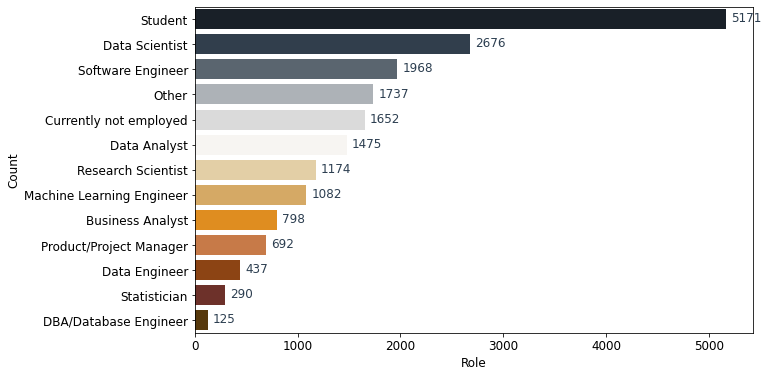

In [23]:
palette=np.array(["#17202A", "#2C3E50", "#566573", "#ABB2B9", "#DADADA", "#F8F5F1", "#EDD39C", "#E8AD52", "#FF9200", "#DC7633", "#A04000", "#78281F", "#633C00"])
plt.figure(figsize=(10, 6))
bar=sns.barplot(x="Count", y="index", palette=palette, data=role)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel("Role", size=12)
plt.ylabel("Count", size=12);

for index, b in enumerate(bar.patches):
    bar.text(b.get_width()+50, b.get_y()+0.5, role["Count"][index], color=palette[1], size=12)

### 7) Where are the most people from?

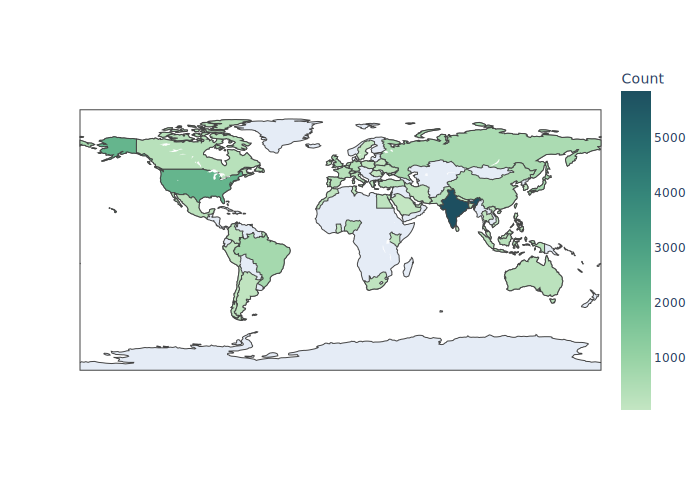

In [33]:
name=df.columns[3]
country = df[name].value_counts().to_frame(name="Count").reset_index()
fig = px.choropleth(country, locations="index",
                    locationmode = 'country names',
                    color="Count", # lifeExp is a column of gapminder
                    hover_name="index", # column to add to hover information
                     
                    color_continuous_scale=px.colors.sequential.Blugrn)

fig.show(renderer="svg")

In [38]:
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Trains","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 8) what level of education most people have?

In [57]:
name1=df.columns[4]
name1
name2=df.columns[3]
name1

'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'

In [60]:
degree=df.groupby([name1])[name1].count().sort_values(ascending=True)  #Group according to No of degree holders

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
No formal education past high school                                  240
I prefer not to answer                                                399
Professional degree                                                   699
Some college/university study without earning a bachelor’s degree    1092
Doctoral degree                                                      2302
Bachelor’s degree                                                    6978
Master’s degree                                                      7859
Name: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?, dtype: int64

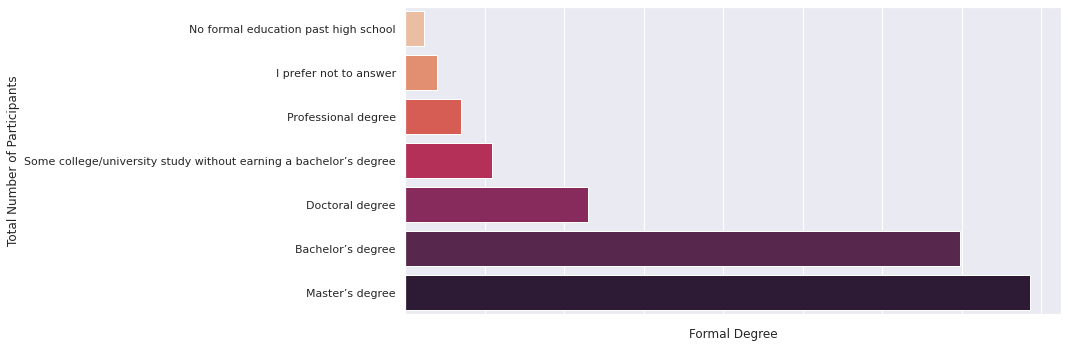

In [62]:
x=degree.index
y=degree.values

plt.figure(figsize=(15,5))
sns.set(font_scale=1)

ax=sns.barplot(y,x,palette="rocket_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=20, ha="right")

ax.set(xlabel='Formal Degree', ylabel='Total Number of Participants')

plt.tight_layout()
plt.show()